---
title: "least squares"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: true
    code-summary: "Show the code"
---

## ordinary least squares (OLS) regression

Let's go over a few things that appear in this notebook, [statsmodels, Ordinary Least Squares](https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html)

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
sns.set_theme(style="ticks", font_scale=1.5)
np.random.seed(9876789)

## polynomial regression

In [57]:
# number of points
nsample = 100
# create independent variable x
x = np.linspace(0, 10, 100)
# create design matrix with linear and quadratic terms
X = np.column_stack((x, x ** 2))
# create coefficients array
beta = np.array([5, -2, 0.5])
# create random error term
e = np.random.normal(size=nsample)

$x$ and $e$ can be understood as column vectors of length $n$, while $X$ and $\beta$ are:
$$
X = 
\begin{pmatrix}
x_0 & x_0^2 \\
| & | \\
x_i & x_i^2 \\
| & | \\
x_n & x_n^2 \\
\end{pmatrix}, \qquad

\beta = 
\begin{pmatrix}
\beta_0 \\
\beta_1 \\
\beta_2
\end{pmatrix},
$$

In [58]:
X = sm.add_constant(X)

What happened above? We added a column of ones to the left of $X$ to account for the intercept term $\beta_0$. The matrix $X$ is now a **design matrix** for a polynomial regression of degree 2.
$$
X = 
\begin{pmatrix}
1 & x_0 & x_0^2 \\
| & | & | \\
1 & x_i & x_i^2 \\
| & | & | \\
1 & x_n & x_n^2 \\
\end{pmatrix}
$$

We now put everything together in the following equation:

$$
y = X \beta + e
$$

This creates the dependend variable $y$ as a linear combination of the independent variables in $X$ and the coefficients in $\beta$, plus an error term $e$.

In [59]:
y = np.dot(X, beta) + e

Let's visualize this:

[Text(0.5, 0, 'x'),
 Text(0, 0.5, 'y'),
 Text(0.5, 1.0, 'Simulated Data with Linear and Quadratic Terms')]

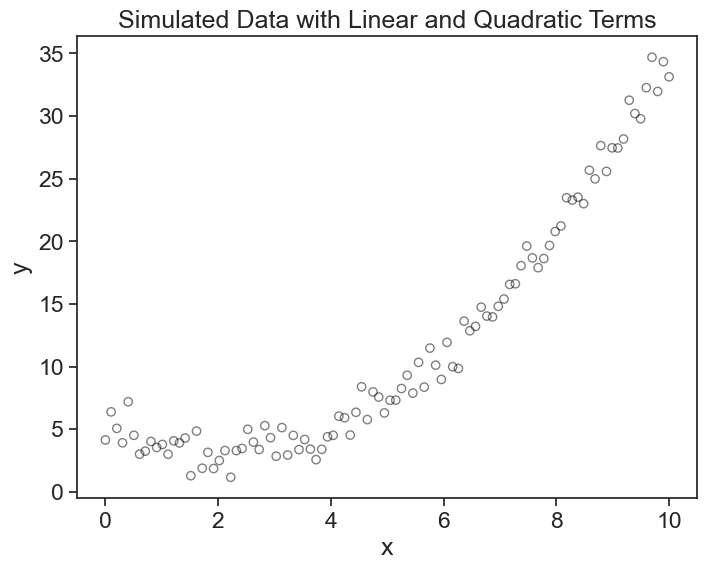

In [60]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x, y, label='data', facecolors='none', edgecolors='black', alpha=0.5)
ax.set(xlabel='x',
       ylabel='y',
       title='Simulated Data with Linear and Quadratic Terms')

Let's run the Ordinary Least Squares regression and see what it gives.

In [61]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())
print("Parameters: ", results.params)
print("R2: ", results.rsquared)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     3965.
Date:                Thu, 19 Jun 2025   Prob (F-statistic):           9.77e-94
Time:                        19:10:17   Log-Likelihood:                -146.51
No. Observations:                 100   AIC:                             299.0
Df Residuals:                      97   BIC:                             306.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3423      0.313     17.083      0.0

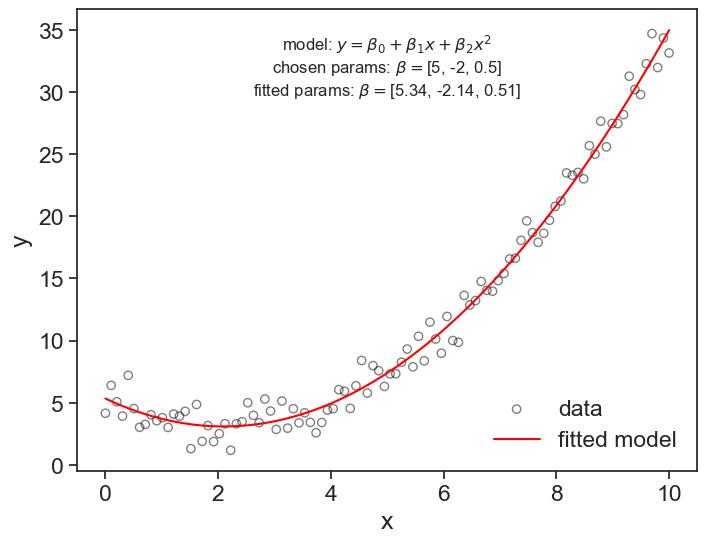

In [62]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x, y, label='data', facecolors='none', edgecolors='black', alpha=0.5)
ax.set(xlabel='x',
       ylabel='y',
       )
ax.plot(x, results.fittedvalues, label='fitted model', color='red')
ax.text(0.50, 0.95,
        ("model: " + 
         r"$y = \beta_0 + \beta_1 x + \beta_2 x^2$" + 
         "\nchosen params: " + r"$\beta=$[5, -2, 0.5]" +
         "\nfitted params: " + r"$\beta=$" + f"[{results.params[0]:.2f}, {results.params[1]:.2f}, {results.params[2]:.2f}]"
         ),
        transform=ax.transAxes, fontsize=12, va='top', ha="center")
ax.legend(frameon=False)

## nonlinear function

In [63]:
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x - 5) ** 2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.0]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)


[Text(0.5, 0, 'x'), Text(0, 0.5, 'y')]

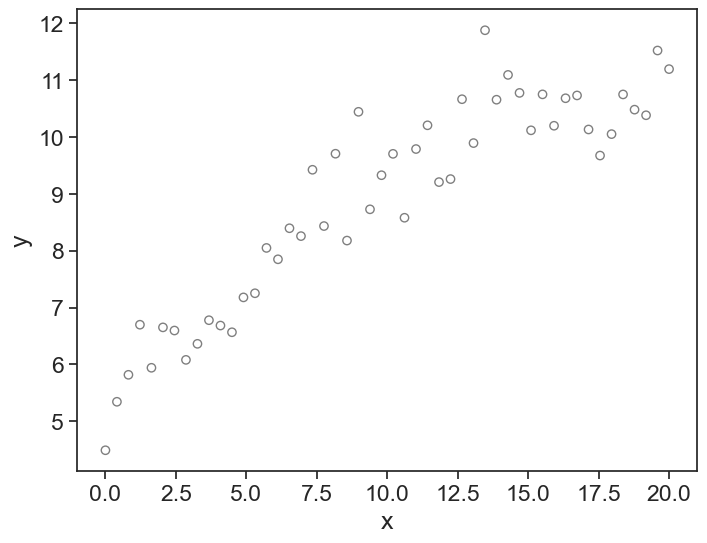

In [64]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x, y, label='data', facecolors='none', edgecolors='black', alpha=0.5)
ax.set(xlabel='x',
       ylabel='y',
    #    title='Simulated Data with Linear and Quadratic Terms'
       )

In [65]:
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     211.8
Date:                Thu, 19 Jun 2025   Prob (F-statistic):           6.30e-27
Time:                        19:10:18   Log-Likelihood:                -34.438
No. Observations:                  50   AIC:                             76.88
Df Residuals:                      46   BIC:                             84.52
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4687      0.026     17.751      0.0